#### IMDB_RNN
- num_words = vocab_size
- maxlen = max_length
- LSTM units = 64, dropout = 0.4
- batch_size = 64, epochs = 5

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

## Import data

In [3]:
vocab_size = 10000
max_length = 180

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# num_words設定常用字的數量 (包含太多罕用字可能影響學習)

In [5]:
word_to_index = imdb.get_word_index()
index_to_word = {v: k for k, v in word_to_index.items()}

In [6]:
# 一則評論的文字 
" ".join([index_to_word[i] for i in x_train[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [7]:
# 該評論共有218個字
len(x_train[0])

218

In [8]:
average_length = np.mean([len(x) for x in x_train])
median_length = sorted([len(x) for x in x_train])[len(x_train) // 2]

print("Average length:", average_length) 
print("Median length:", median_length) # --> thus set max_length to 180

Average length: 238.71364
Median length: 178


In [9]:
# 該評論為正向 (負向為0)
y_train[0]

1

In [10]:
x_train.shape

(25000,)

## Process data

In [11]:
# 將每個評論取固定長度 (太短補0, 太長切掉)
# by default the padding and truncating are before the sequence ('pre')
x_train = sequence.pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = sequence.pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [12]:
x_train.shape

(25000, 180)

## Build the model

In [29]:
model = Sequential()

In [30]:
# 將一開始所設定的num_words重新設定 (為節省先前one-hot encoding的空間)
# 將vocab_size維度的one-hot encoding 壓成64維

model.add(Embedding(vocab_size, 128))

In [31]:
# dropout避免overfitting (每次隨機抽出20%的資料不參與訓練)

model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.2))

In [32]:
# 輸出為0到1中間的數字 --> sigmoid
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [35]:
# emdedding param = 20000(vocab_size) * 64(input_dim)
# lstm param = (64(input_dim) + 50(lstm_units) + 1(bias)) * 4 * 50(lstm_units)

(128+64+1)*4*64

49408

## Train the model

In [36]:
history = model.fit(x_train, y_train, batch_size=96, epochs=4,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 146s 6ms/sample - loss: 0.6582 - accuracy: 0.6097 - val_loss: 0.6332 - val_accuracy: 0.6628
Epoch 2/4
25000/25000 [==============================] - 145s 6ms/sample - loss: 0.6250 - accuracy: 0.6581 - val_loss: 0.5535 - val_accuracy: 0.7150
Epoch 3/4
25000/25000 [==============================] - 152s 6ms/sample - loss: 0.5319 - accuracy: 0.7662 - val_loss: 0.6295 - val_accuracy: 0.7181
Epoch 4/4
25000/25000 [==============================] - 173s 7ms/sample - loss: 0.5647 - accuracy: 0.7013 - val_loss: 0.5107 - val_accuracy: 0.7871


In [37]:
history_2 = model.fit(x_train, y_train, batch_size=48, epochs=5,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 208s 8ms/sample - loss: 0.5011 - accuracy: 0.7752 - val_loss: 0.6206 - val_accuracy: 0.7299
Epoch 2/5
25000/25000 [==============================] - 582s 23ms/sample - loss: 0.4091 - accuracy: 0.8343 - val_loss: 0.7806 - val_accuracy: 0.6256
Epoch 3/5
25000/25000 [==============================] - 128s 5ms/sample - loss: 0.3503 - accuracy: 0.8602 - val_loss: 0.4719 - val_accuracy: 0.8026
Epoch 4/5
25000/25000 [==============================] - 128s 5ms/sample - loss: 0.2616 - accuracy: 0.9000 - val_loss: 0.4005 - val_accuracy: 0.8333
Epoch 5/5
25000/25000 [==============================] - 131s 5ms/sample - loss: 0.2145 - accuracy: 0.9218 - val_loss: 0.4084 - val_accuracy: 0.8374


In [38]:
history_3 = model.fit(x_train, y_train, batch_size=24, epochs=5,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 210s 8ms/sample - loss: 0.1897 - accuracy: 0.9317 - val_loss: 0.4151 - val_accuracy: 0.8412
Epoch 2/5
25000/25000 [==============================] - 219s 9ms/sample - loss: 0.1452 - accuracy: 0.9503 - val_loss: 0.4402 - val_accuracy: 0.8400
Epoch 3/5
25000/25000 [==============================] - 219s 9ms/sample - loss: 0.1090 - accuracy: 0.9654 - val_loss: 0.5032 - val_accuracy: 0.8309
Epoch 4/5
25000/25000 [==============================] - 218s 9ms/sample - loss: 0.0817 - accuracy: 0.9742 - val_loss: 0.5765 - val_accuracy: 0.8298
Epoch 5/5
25000/25000 [==============================] - 231s 9ms/sample - loss: 0.0631 - accuracy: 0.9806 - val_loss: 0.6475 - val_accuracy: 0.8273


## Evaluate

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

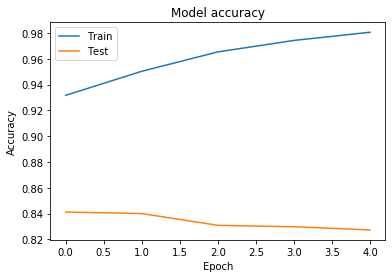

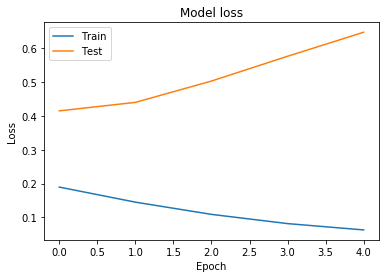

In [41]:
# Plot training & validation accuracy values
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The result indicates model overfitting.

## Save weights

In [23]:
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model_weights.h5')